<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/3.2pretrained_ekstraksi_dan_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


load korpus

In [2]:
url1 = '/content/drive/MyDrive/dataisear(preputama).csv'
url2 = '/content/drive/MyDrive/dataisear(preptambah).csv'
korpus2='/content/drive/MyDrive/korpusklasifikasi2(preputama).csv'
df = pd.read_csv(korpus2)

In [ ]:
temp=[]
for senten in df.dokumen:
  temp.append(ast.literal_eval(senten))
df.dokumen=temp

In [4]:
temp=[]
for senten in df.sentiment:
  temp.append(ast.literal_eval(senten))
df.sentiment=temp

load model pretrained

In [5]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import get_tmpfile


In [ ]:
oslo1='/content/drive/MyDrive/Gensim Continuous Skipgram no lemma.bin'
oslo2='/content/drive/MyDrive/Global Vectors no lemma.txt'

In [ ]:
w2vtweet='/content/drive/MyDrive/word2vec_twitter_tokens (1).bin'
glovetweet='/content/drive/MyDrive/glove.twitter.27B.100d.txt'
glovetweet2='/content/drive/MyDrive/enwiki.skip.size100.win10.neg15.sample1e-5.min15.txt'

In [6]:
w2vlain='/content/drive/MyDrive/enwiki.skip.size100.win10.neg15.sample1e-5.min15.txt'

In [ ]:
# model=gensim.models.word2vec.Word2Vec.load(w2vlain)

In [ ]:
# premodel = KeyedVectors.load_word2vec_format(w2vlain, binary=True,encoding='utf-8')

In [7]:
model = KeyedVectors.load_word2vec_format(w2vlain, binary=False)

In [8]:
model.wv.vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


(400000, 100)

In [ ]:
tmp_file = get_tmpfile("test_word2vec.txt")
glove2word2vec(glovetweet2, tmp_file)
model = KeyedVectors.load_word2vec_format(tmp_file)

In [ ]:
model.wv.vectors.shape

In [ ]:
premodel.wv.most_similar('me')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('you', 0.9431200623512268),
 ('my', 0.9270224571228027),
 ('myself', 0.9182223081588745),
 ("'m", 0.9053815603256226),
 ('somebody', 0.8988710641860962),
 ('yourself', 0.8796242475509644),
 ('you/you', 0.8744150400161743),
 ('yours', 0.8691789507865906),
 ("'re", 0.8691775798797607),
 ("'ll", 0.8676973581314087)]

In [ ]:
model.wv.vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


(400000, 100)

In [ ]:
model.wv.most_similar('not')

[('amnt', 0.8143506050109863),
 ('isnt', 0.8028733730316162),
 ('hmmmnot', 0.7910065054893494),
 ('promisenbsp', 0.7907173037528992),
 ('butwhat', 0.7885343432426453),
 ('bearly', 0.787845253944397),
 ('unrealistically', 0.7865164279937744),
 ('shutin', 0.7863471508026123),
 ('definitively', 0.7856874465942383),
 ('reguardless', 0.7855291962623596)]

reduce dimensi

In [ ]:
import sklearn.datasets
!pip install umap-learn[plot]
import plotly.express as px
from umap import UMAP

In [ ]:
reduced = UMAP(n_components=100).fit_transform(premodel.wv.vectors)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



In [ ]:
premodel.wv.vectors=reduced

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



In [ ]:
premodel.wv.vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



(291186, 100)

pilih model

In [10]:
pakai_model=3

load model

In [ ]:
from gensim.models import word2vec
!pip install glove-python-binary
from glove import Glove
from glove import Corpus

     |████████████████████████████████| 948 kB 7.6 MB/s 


In [ ]:
if pakai_model == 1:#load model word2vec
  model = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/korpusblogspertiga(preputama).w2v')

elif pakai_model == 2:#load model glove
  model=Glove.load('/content/drive/MyDrive/korpusblogspertiga(preputama).glove')

cek model

In [ ]:
if pakai_model == 1:
  print(premodel.wv.vectors.shape)
elif pakai_model == 2:
  print(model.word_vectors.shape)

(1193514, 100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



In [ ]:
if pakai_model == 1:
  print(model.wv["moment"])
elif pakai_model == 2:
  print(model.word_vectors[model.dictionary['moment']])

ambil conntoh model wor embedding

In [ ]:
import array
count=0
simpanang=[]
simpankat=[]
jml=24
if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      simpanang.append(model.wv[word])
      simpankat.append(word)
      if count<jml:
        count+=1
      else :
        break
    if count<jml:
      count+=1
    else :
      break

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      simpanang.append(model.word_vectors[model.dictionary[word]])
      simpankat.append(word)
      if count<jml:
        count+=1
      else :
        break
    if count<jml:
      count+=1
    else :
      break

has_vec=ekstrak

In [ ]:
dfang=pd.DataFrame(simpanang)
dfkat=pd.DataFrame(simpankat)
result = pd.concat([dfkat, dfang], axis=1)
result.shape

(24, 101)

In [ ]:
result.to_excel("preptambah,glove.xlsx")

average base ekstraksi fitur

In [16]:
df

,tweet_id,sentiment,content
0,1956968477,[worry],Re-pinging : why didn't you go to prom? BC my ...
1,1956968636,[worry],Hmmm. is down
2,1956969035,[sadness],Charlene my love. I miss you
3,1956969172,[sadness],I'm sorry at least it's Friday?
4,1956970047,[sadness],Ugh! I have to beat this stupid song to get to...
...,...,...,...
9307,1753905073,[neutral],"not really just leaving flat now, on the looko..."
9308,1753918809,[happiness],"gave the bikes a thorough wash, degrease it an..."
9309,1753918822,[love],His snoring is so annoying n it keeps me from ...
9310,1753919001,[love],Happy Mothers Day All my love


In [14]:
import array
ekstrak=[]
dim1=100
dim3=300
temp=array.array('i',(0,)*dim1)
hitungpre=0
hitungbiasa=0

if pakai_model == 1:
  for senten in df.dokumen:
    jumlah_dipakai=0
    for word in senten:
      try:
        temp=np.add(temp,model.wv[word])
        jumlah_dipakai+=1
        hitungpre+=1
      except:
        temp=np.add(temp,np.zeros((100)))
        hitungbiasa+=1
    if jumlah_dipakai!=0:
      temp=temp/jumlah_dipakai
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      try:
        temp=np.add(temp,premodel.wv[word])
        hitungpre+=1
      except:
        temp=np.add(temp,model.word_vectors[model.dictionary[word]])
        hitungbiasa+=1
    temp=temp/len(senten)
    ekstrak.append(temp)

if pakai_model == 3:
  for senten in df.content:
    jumlah_dipakai=0
    for word in senten:
      try:
        temp=np.add(temp,model.wv[word])
        jumlah_dipakai+=1
        hitungpre+=1
      except:
        temp=np.add(temp,np.zeros((100)))
        hitungbiasa+=1
    if jumlah_dipakai!=0:
      temp=temp/jumlah_dipakai
    ekstrak.append(temp)

has_vec=ekstrak

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


TypeError: ignored

In [15]:
print(hitungpre)
print(hitungbiasa)
print(hitungpre+hitungbiasa)

92926
26237
119163


In [13]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

AttributeError: ignored

klasifikasi svm

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [ ]:
def klasifikasi(y_pred):
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

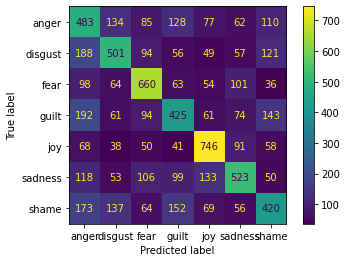

0.5
(0.5005707953753754, 0.4992048470983857, 0.49831355534382, None)


In [ ]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr', C=17)
# acc10k=cross_val_score(clf, X, y, cv=10)
# np.mean(acc10k)
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

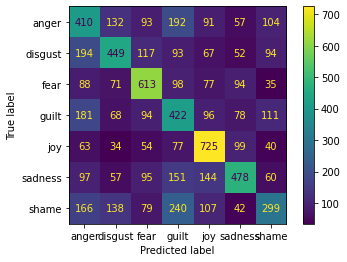

0.4518360830228845
(0.45288456610265965, 0.45109454607520766, 0.4481953045392918, None)


In [ ]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

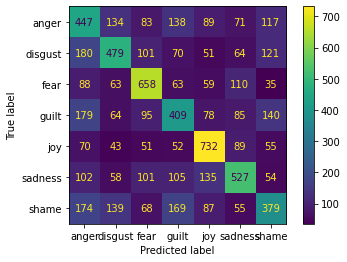

0.483102714209686
(0.48089828071257384, 0.4822756198515933, 0.48022073538780535, None)


In [ ]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)